# Rain in Australia Prediction Using Logistic Regression, KNN, CART, and Random Forest

The aim of this project is to predict the next-day rain with some information relating to the weather. The target variable is binary. And through this project, binary classification will be carried out with various classifaction methods to find the best model that suits the case. Data exploration also will be done to identify the characteristics of the data.

## Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd

## Reading The Dataset

In [4]:
data=pd.read_csv(r"C:\Users\02915P744\Downloads\Rainfall_Prediction.csv",sep=",")
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


## Exploratory Data Analysis

### Dataset Shape

In [5]:
data.shape

(8425, 23)

This dataset contains 145460 rows and 23 columns

### Dataset Info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

### Changing type of "Date" Column into datetime

In [7]:
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8350 non-null   float64       
 3   MaxTemp        8365 non-null   float64       
 4   Rainfall       8185 non-null   float64       
 5   Evaporation    4913 non-null   float64       
 6   Sunshine       4431 non-null   float64       
 7   WindGustDir    7434 non-null   object        
 8   WindGustSpeed  7434 non-null   float64       
 9   WindDir9am     7596 non-null   object        
 10  WindDir3pm     8117 non-null   object        
 11  WindSpeed9am   8349 non-null   float64       
 12  WindSpeed3pm   8318 non-null   float64       
 13  Humidity9am    8366 non-null   float64       
 14  Humidity3pm    8323 non-null   float64       
 15  Pressure9am    7116 n

### Descriptive Statistics of Numerical Variables

In [8]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


### Descriptive Statistics of Categorical Variables

In [9]:
data.describe(include=['object'])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8425,7434,7596,8117,8185,8186
unique,12,16,16,16,2,2
top,Melbourne,N,N,SE,No,No
freq,1622,713,906,813,6195,6195


### Creating Boxplot

Boxplot can be used to check outliers within the data visually and to identify the distribution of data

In [10]:
import matplotlib.pyplot as plt

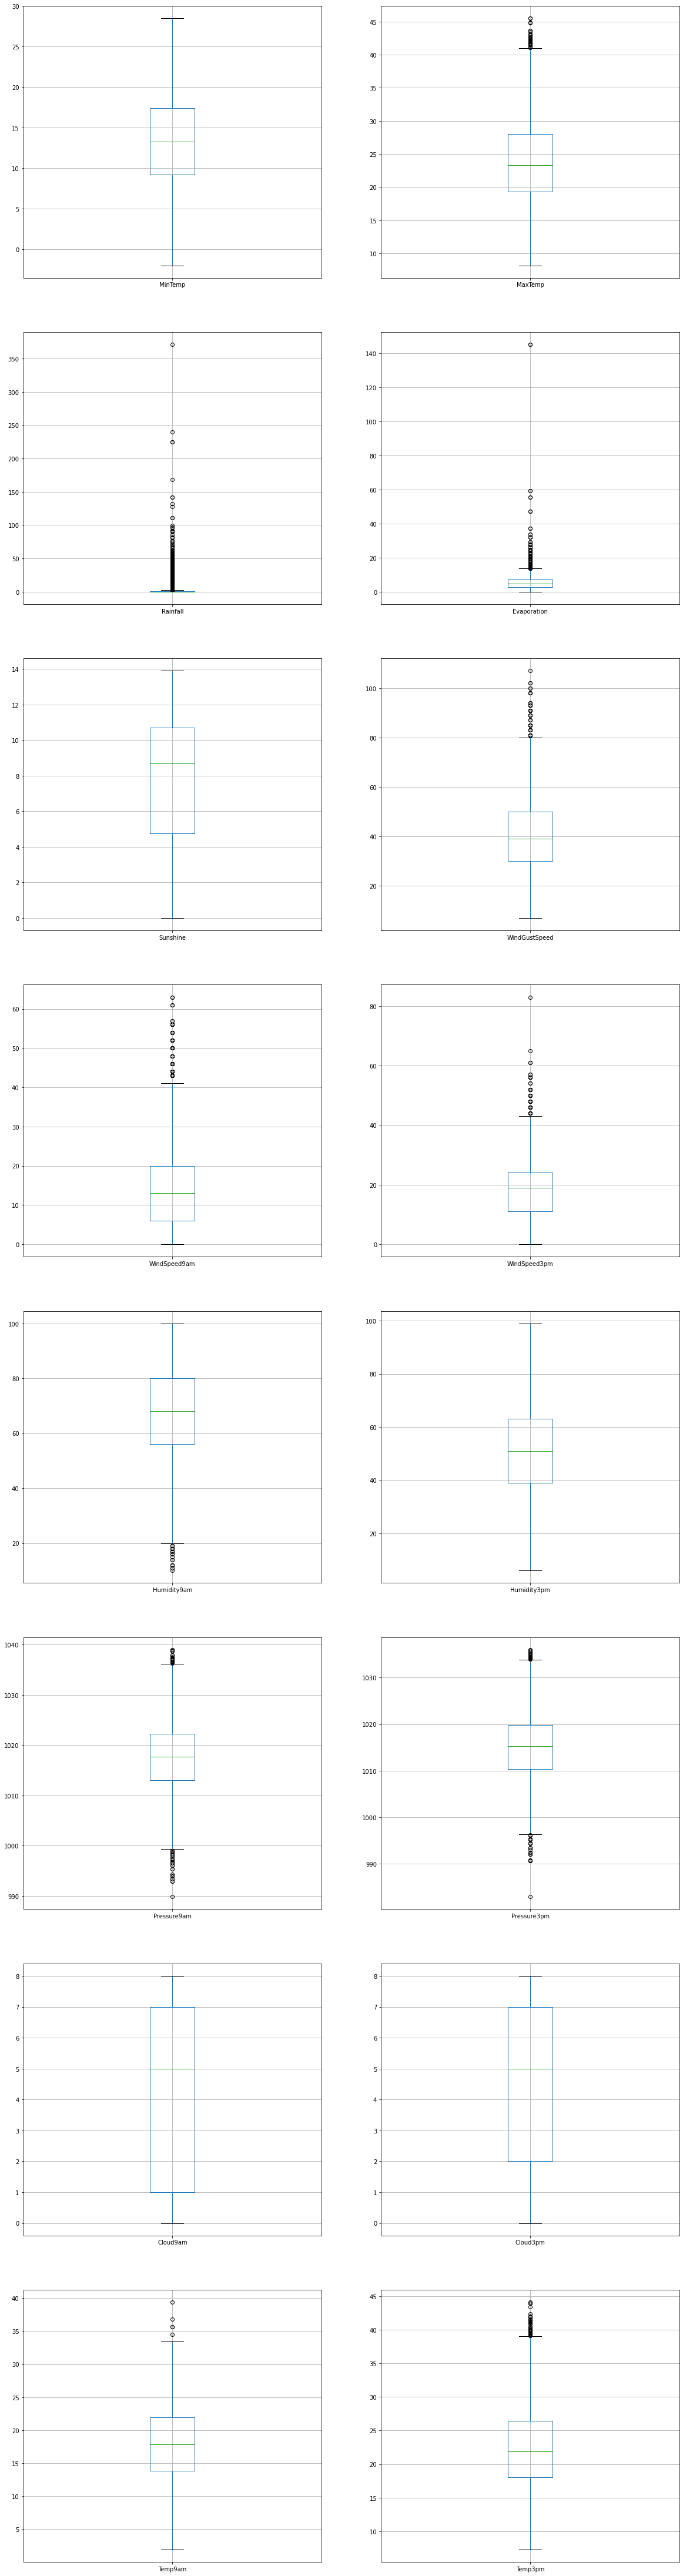

In [11]:
plt.figure(figsize=(20,80))

plt.subplot(8,2,1)
fig=data.boxplot(column='MinTemp')

plt.subplot(8,2,2)
fig=data.boxplot(column='MaxTemp')

plt.subplot(8,2,3)
fig=data.boxplot(column='Rainfall')

plt.subplot(8,2,4)
fig=data.boxplot(column='Evaporation')

plt.subplot(8,2,5)
fig=data.boxplot(column='Sunshine')

plt.subplot(8,2,6)
fig=data.boxplot(column='WindGustSpeed')

plt.subplot(8,2,7)
fig=data.boxplot(column='WindSpeed9am')

plt.subplot(8,2,8)
fig=data.boxplot(column='WindSpeed3pm')

plt.subplot(8,2,9)
fig=data.boxplot(column='Humidity9am')

plt.subplot(8,2,10)
fig=data.boxplot(column='Humidity3pm')

plt.subplot(8,2,11)
fig=data.boxplot(column='Pressure9am')

plt.subplot(8,2,12)
fig=data.boxplot(column='Pressure3pm')

plt.subplot(8,2,13)
fig=data.boxplot(column='Cloud9am')

plt.subplot(8,2,14)
fig=data.boxplot(column='Cloud3pm')

plt.subplot(8,2,15)
fig=data.boxplot(column='Temp9am')

plt.subplot(8,2,16)
fig=data.boxplot(column='Temp3pm')

plt.show()

From those boxplot graphs above, most numerical variables contain outliers.

### Creating Histogram to Check The Distribution of Data

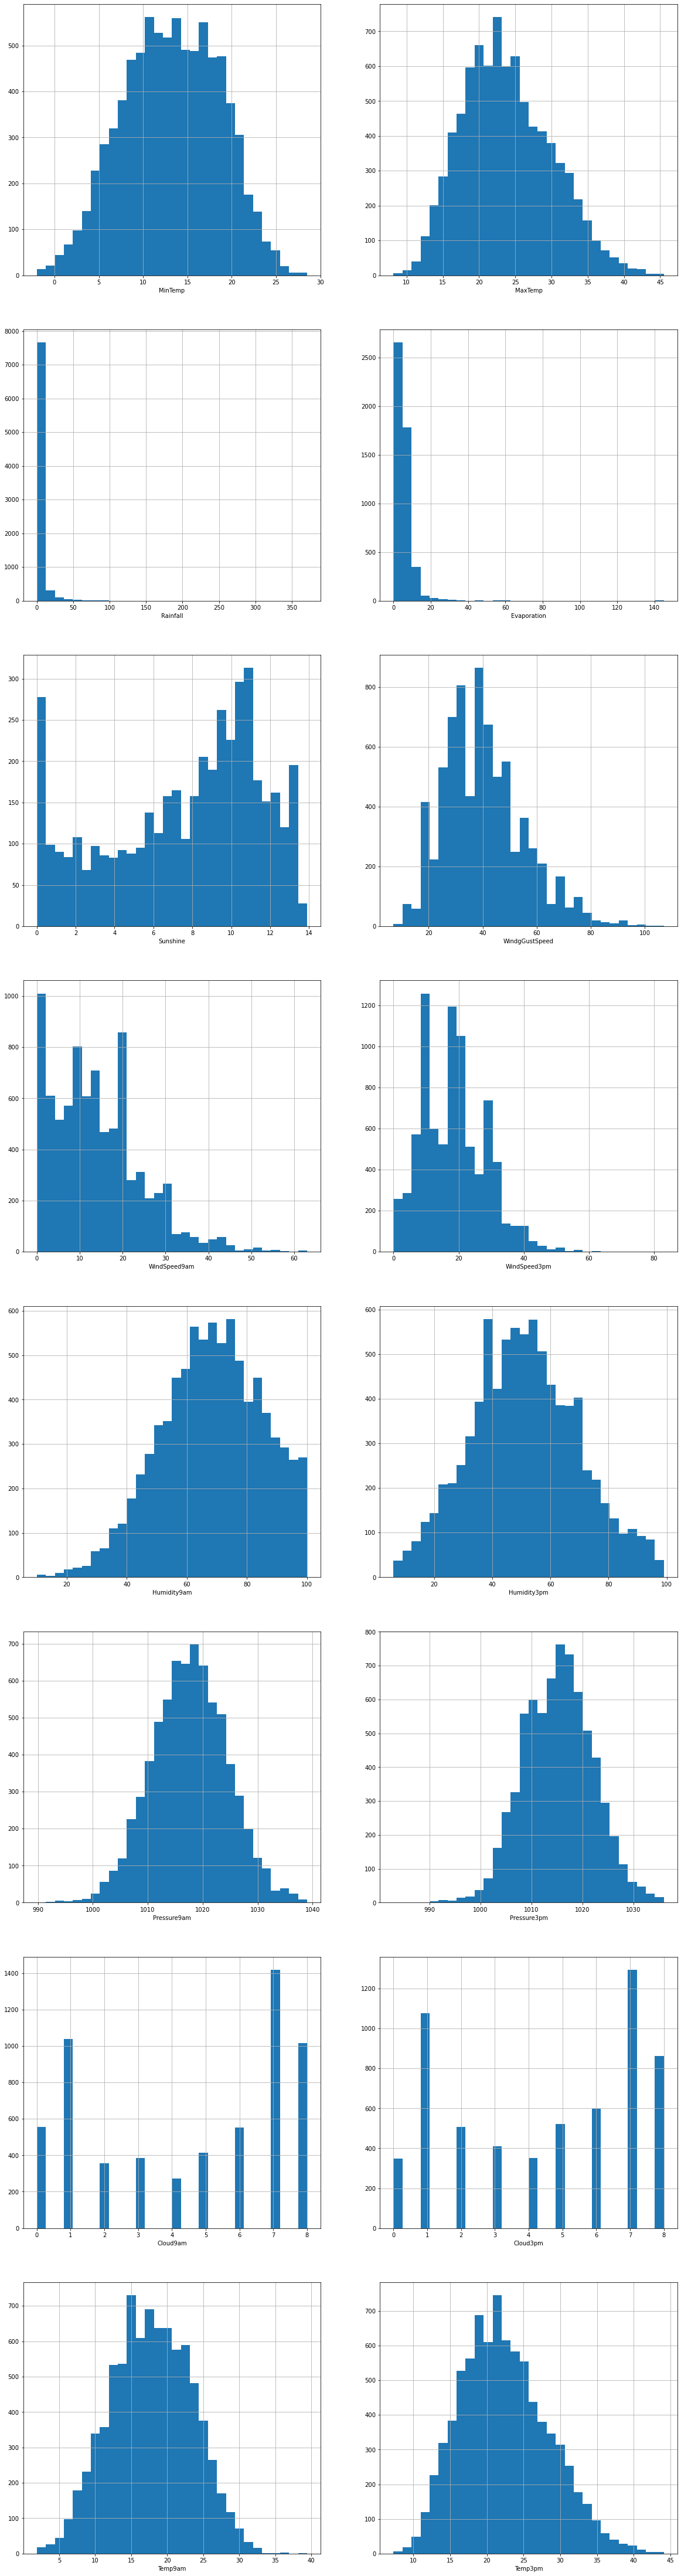

In [12]:
plt.figure(figsize=(20,80))

plt.subplot(8,2,1)
fig=data.MinTemp.hist(bins=30)
fig.set_xlabel('MinTemp')

plt.subplot(8,2,2)
fig=data.MaxTemp.hist(bins=30)
fig.set_xlabel('MaxTemp')

plt.subplot(8,2,3)
fig=data.Rainfall.hist(bins=30)
fig.set_xlabel('Rainfall')

plt.subplot(8,2,4)
fig=data.Evaporation.hist(bins=30)
fig.set_xlabel('Evaporation')

plt.subplot(8,2,5)
fig=data.Sunshine.hist(bins=30)
fig.set_xlabel('Sunshine')

plt.subplot(8,2,6)
fig=data.WindGustSpeed.hist(bins=30)
fig.set_xlabel('WindgGustSpeed')


plt.subplot(8,2,7)
fig=data.WindSpeed9am.hist(bins=30)
fig.set_xlabel('WindSpeed9am')

plt.subplot(8,2,8)
fig=data.WindSpeed3pm.hist(bins=30)
fig.set_xlabel('WindSpeed3pm')

plt.subplot(8,2,9)
fig=data.Humidity9am.hist(bins=30)
fig.set_xlabel('Humidity9am')

plt.subplot(8,2,10)
fig=data.Humidity3pm.hist(bins=30)
fig.set_xlabel('Humidity3pm')

plt.subplot(8,2,11)
fig=data.Pressure9am.hist(bins=30)
fig.set_xlabel('Pressure9am')

plt.subplot(8,2,12)
fig=data.Pressure3pm.hist(bins=30)
fig.set_xlabel('Pressure3pm')

plt.subplot(8,2,13)
fig=data.Cloud9am.hist(bins=30)
fig.set_xlabel('Cloud9am')

plt.subplot(8,2,14)
fig=data.Cloud3pm.hist(bins=30)
fig.set_xlabel('Cloud3pm')

plt.subplot(8,2,15)
fig=data.Temp9am.hist(bins=30)
fig.set_xlabel('Temp9am')

plt.subplot(8,2,16)
fig=data.Temp3pm.hist(bins=30)
fig.set_xlabel('Temp3pm')
plt.show()

In [13]:
data['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

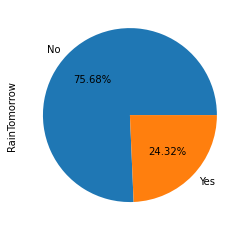

In [14]:
data['RainTomorrow'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

Based on the data, the percentage of the next-day rained is 21.91%, meanwhile the percentage of the next-day did not rain is 78,09%. \

**Conclusion**\
The data is imbalanced

In [15]:
import seaborn as sns

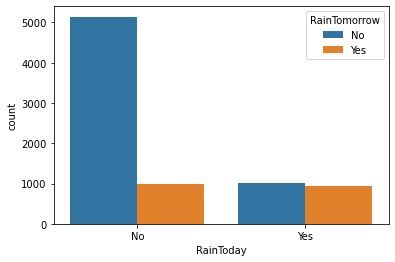

In [16]:
sns.countplot(x='RainToday',data=data,hue='RainTomorrow')
plt.show()

Based on the barplot above, if today had not rained, the possibility that the next day would not have rained is the highest.

In [17]:
yes=data[data['RainToday']=="Yes"]
no=data[data['RainToday']=='No']

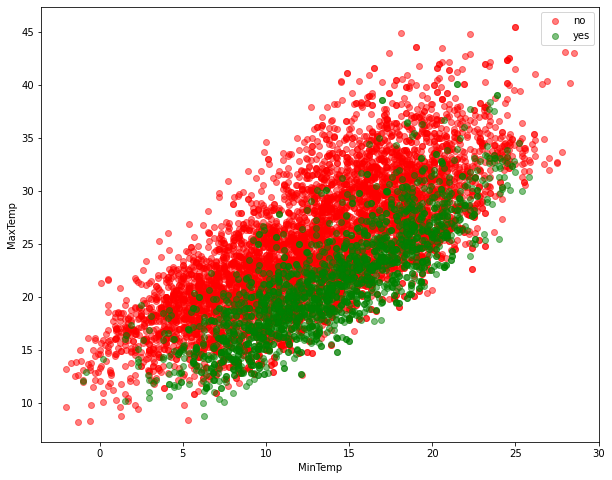

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(no["MinTemp"],no["MaxTemp"],color="red",label="no",alpha=0.5)
plt.scatter(yes["MinTemp"],yes["MaxTemp"],color='green',label="yes",alpha=0.5)
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.legend()
plt.show()

If today had rained, the maximum temperature tended to be higher.

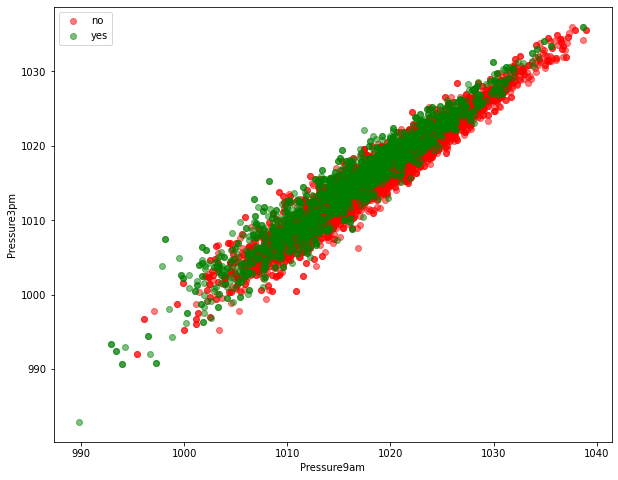

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(no["Pressure9am"],no["Pressure3pm"],color="red",label="no",alpha=0.5)
plt.scatter(yes["Pressure9am"],yes["Pressure3pm"],color='green',label="yes",alpha=0.5)
plt.xlabel("Pressure9am")
plt.ylabel("Pressure3pm")
plt.legend()
plt.show()

The pressure at 9 am has positive correlation with pressure at 3 pm.

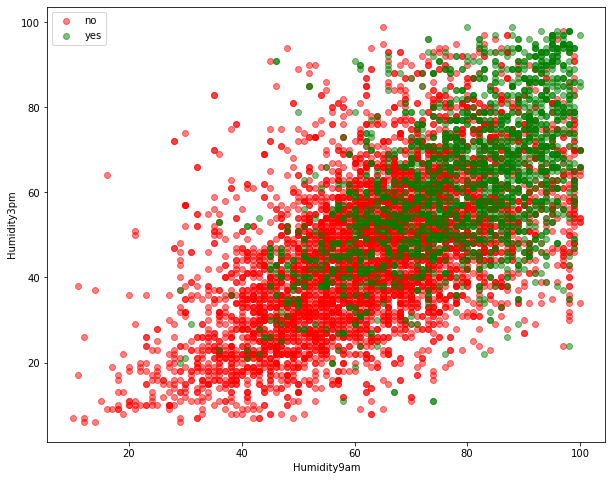

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(no["Humidity9am"],no["Humidity3pm"],color="red",label="no",alpha=0.5)
plt.scatter(yes["Humidity9am"],yes["Humidity3pm"],color='green',label="yes",alpha=0.5)
plt.xlabel("Humidity9am")
plt.ylabel("Humidity3pm")
plt.legend()
plt.show()

If today had rained, the humidity tended to be lower than if it had not rained.

### Correlation

In [21]:
correlation=data.corr()
print(correlation)

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.720955  0.091642     0.348643  0.081365   
MaxTemp        0.720955  1.000000 -0.088906     0.424728  0.523909   
Rainfall       0.091642 -0.088906  1.000000     0.043463 -0.209654   
Evaporation    0.348643  0.424728  0.043463     1.000000  0.340893   
Sunshine       0.081365  0.523909 -0.209654     0.340893  1.000000   
WindGustSpeed  0.241317  0.146113  0.104999     0.214069 -0.018455   
WindSpeed9am   0.137263  0.013425  0.051349     0.176701 -0.025112   
WindSpeed3pm   0.180091  0.088797  0.025185     0.142421  0.045031   
Humidity9am   -0.130906 -0.392496  0.231702    -0.286869 -0.512349   
Humidity3pm    0.079569 -0.424217  0.238730    -0.221244 -0.630536   
Pressure9am   -0.465478 -0.347285 -0.080412    -0.218171  0.028666   
Pressure3pm   -0.458665 -0.430074 -0.037270    -0.233401 -0.047098   
Cloud9am       0.111213 -0.307700  0.195157    -0.084288 -0.705577   
Cloud3pm       0.046

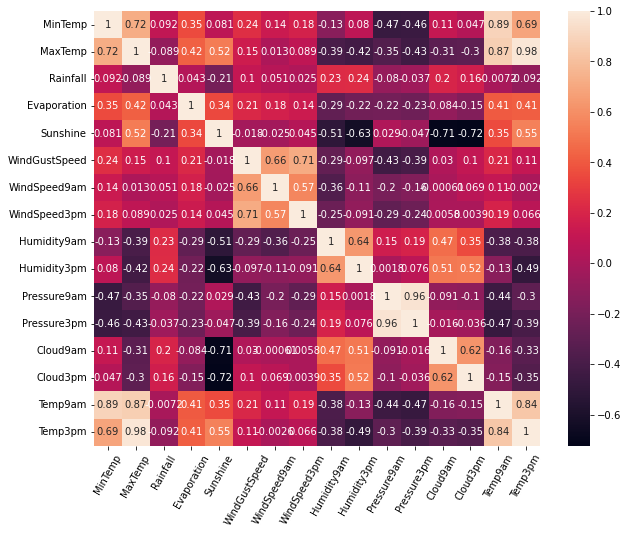

In [22]:
plt.figure(figsize=(10,8))
corrplot=sns.heatmap(correlation,annot=True)
corrplot.set_xticklabels(corrplot.get_xticklabels(),rotation=60)
plt.show()

## Pre-processing

### Checking Missing Value

In [23]:
print("The Percentage of Missing Value")
for col in data.columns:
    print(col+" : "+str(round(data[col].isnull().sum()/data.shape[0]*100,2))+"%")

The Percentage of Missing Value
Date : 0.0%
Location : 0.0%
MinTemp : 0.89%
MaxTemp : 0.71%
Rainfall : 2.85%
Evaporation : 41.69%
Sunshine : 47.41%
WindGustDir : 11.76%
WindGustSpeed : 11.76%
WindDir9am : 9.84%
WindDir3pm : 3.66%
WindSpeed9am : 0.9%
WindSpeed3pm : 1.27%
Humidity9am : 0.7%
Humidity3pm : 1.21%
Pressure9am : 15.54%
Pressure3pm : 15.57%
Cloud9am : 28.74%
Cloud3pm : 29.14%
Temp9am : 0.66%
Temp3pm : 1.14%
RainToday : 2.85%
RainTomorrow : 2.84%


### Dropping Columns that Contain Missing Value More than 30%

In [24]:
data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8350 non-null   float64       
 3   MaxTemp        8365 non-null   float64       
 4   Rainfall       8185 non-null   float64       
 5   WindGustDir    7434 non-null   object        
 6   WindGustSpeed  7434 non-null   float64       
 7   WindDir9am     7596 non-null   object        
 8   WindDir3pm     8117 non-null   object        
 9   WindSpeed9am   8349 non-null   float64       
 10  WindSpeed3pm   8318 non-null   float64       
 11  Humidity9am    8366 non-null   float64       
 12  Humidity3pm    8323 non-null   float64       
 13  Pressure9am    7116 non-null   float64       
 14  Pressure3pm    7113 non-null   float64       
 15  Temp9am        8369 n

### Choosing Name of Numerical Variables

In [25]:
num=[col 
     for col in data.columns
        if data[col].dtype!='O']
num=num[1:]
print(num)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


### Choosing Name of Categorical Variables

In [26]:
cat=[col
    for col in data.columns
        if data[col].dtype=="O"]
print(cat)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


### Impute missing value in numerical variabel with its median

In [27]:
for value in [data]:
    for col in num:
        col_median=data[col].median()
        value[col].fillna(col_median, inplace=True)

data[num].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

### Impute missing value in categorical variable with its mode

In [28]:
for value in [data]:
    for col in cat:
        col_mode=data[col].mode()[0]
        value[col].fillna(col_mode, inplace=True)
        
data[cat].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

### Dropping Unnecessary Column

In [29]:
data.drop('Date',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   WindGustDir    8425 non-null   object 
 5   WindGustSpeed  8425 non-null   float64
 6   WindDir9am     8425 non-null   object 
 7   WindDir3pm     8425 non-null   object 
 8   WindSpeed9am   8425 non-null   float64
 9   WindSpeed3pm   8425 non-null   float64
 10  Humidity9am    8425 non-null   float64
 11  Humidity3pm    8425 non-null   float64
 12  Pressure9am    8425 non-null   float64
 13  Pressure3pm    8425 non-null   float64
 14  Temp9am        8425 non-null   float64
 15  Temp3pm        8425 non-null   float64
 16  RainToday      8425 non-null   object 
 17  RainTomorrow   8425 non-null   object 
dtypes: float

### Detecting Outliers Using Z-Score

In [30]:
from scipy import stats

In [31]:
z=np.abs(stats.zscore(data._get_numeric_data()))
print(z)

       MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     0.038248  0.156352  0.206021       0.287630      0.608197      0.562679   
1     1.077164  0.203458  0.264165       0.287630      0.971536      0.356585   
2     0.054703  0.301588  0.264165       0.432763      0.509464      0.768772   
3     0.742540  0.677754  0.264165       1.163698      0.280403      0.983024   
4     0.800447  1.381019  0.167258       0.069931      0.675336      0.150491   
...        ...       ...       ...            ...           ...           ...   
8420  1.932313  0.074577  0.264165       0.655733      0.082936      0.776930   
8421  1.783591  0.236168  0.264165       1.308831      0.082936      0.983024   
8422  1.448968  0.497848  0.264165       0.220335      0.477869      0.983024   
8423  1.002803  0.514203  0.264165       0.873433      0.082936      1.189118   
8424  0.317101  0.090932  0.264165       0.075202      0.311997      0.158649   

      Humidity9am  Humidity

### Removing Outliers Observations

Data is considered as outlier if the z-score is bigger than 3.

In [32]:
data=data[(z<=3).all(axis=1)]
print(data.shape)

(8061, 18)


The new data shape after removing outliers is (138208,18)

### Resetting Old Index and Creating New Index

In [33]:
data=data.reset_index()
data.tail(20)

,index,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8041,8405,Uluru,1.2,20.8,0.0,E,43.0,ESE,E,13.0,28.0,29.0,6.0,1029.8,1025.9,7.9,19.9,No,No
8042,8406,Uluru,0.5,21.7,0.0,E,43.0,ESE,ENE,13.0,20.0,27.0,19.0,1029.0,1025.0,9.5,20.5,No,No
8043,8407,Uluru,4.0,20.0,0.0,SE,39.0,ESE,ESE,13.0,26.0,58.0,26.0,1030.2,1026.7,9.1,19.0,No,No
8044,8408,Uluru,3.4,19.8,0.0,E,43.0,ESE,E,19.0,24.0,54.0,23.0,1031.8,1027.7,8.7,18.9,No,No
8045,8409,Uluru,3.2,18.6,0.0,E,46.0,ESE,E,15.0,20.0,56.0,29.0,1031.0,1027.2,8.2,17.4,No,No
8046,8410,Uluru,2.4,19.1,0.0,E,33.0,SE,E,17.0,17.0,59.0,24.0,1030.0,1026.2,8.0,18.8,No,No
8047,8411,Uluru,5.1,19.7,0.0,E,46.0,ESE,E,13.0,17.0,56.0,29.0,1028.5,1025.8,8.5,19.2,No,No
8048,8412,Uluru,2.5,21.2,0.0,ENE,35.0,ESE,E,17.0,19.0,57.0,32.0,1027.2,1023.0,10.3,20.3,No,No
8049,8413,Uluru,2.3,21.4,0.0,SE,22.0,SE,SSE,11.0,7.0,60.0,28.0,1026.9,1022.8,8.9,20.3,No,No
8050,8414,Uluru,2.6,22.5,0.0,S,19.0,S,E,9.0,7.0,59.0,24.0,1025.0,1021.4,8.8,22.1,No,No


In [34]:
data.drop('index',axis=1,inplace=True)

In [35]:
data.tail()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8056,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
8057,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
8058,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
8059,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No
8060,Uluru,14.9,23.3,0.0,N,39.0,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,15.0,20.9,No,No


### Label Encoding for Target Variable

In [36]:
Y=data.iloc[:,17]
Y

0       No
1       No
2       No
3       No
4       No
        ..
8056    No
8057    No
8058    No
8059    No
8060    No
Name: RainTomorrow, Length: 8061, dtype: object

In [37]:
Y.replace({'No':0,'Yes':1},inplace=True)
Y

0       0
1       0
2       0
3       0
4       0
       ..
8056    0
8057    0
8058    0
8059    0
8060    0
Name: RainTomorrow, Length: 8061, dtype: int64

### One-Hot Encoding for Categorical Predictor Variables

In [38]:
X=data.drop(['RainTomorrow'],axis=1)
X

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8056,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No
8057,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No
8058,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No
8059,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No


In [39]:
X=pd.get_dummies(X)
X

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,1,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,1,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8056,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,0,0,0,1,0
8057,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,0,0,0,0,0,0,1,0
8058,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,0,0,0,1,0,1,0
8059,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,...,0,0,0,0,0,0,0,0,1,0


### Scaling Data Using MinMaxScaler

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X), 
                      index=X.index,
                     columns=X.columns)

In [42]:
X_scaled

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.508251,0.434911,0.017964,0.500000,0.454545,0.521739,0.646341,0.172043,0.233244,0.280323,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.310231,0.500000,0.000000,0.500000,0.090909,0.478261,0.317073,0.204301,0.310992,0.299191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.491749,0.517751,0.000000,0.527027,0.431818,0.565217,0.243902,0.258065,0.230563,0.323450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.369637,0.585799,0.000000,0.229730,0.250000,0.195652,0.329268,0.107527,0.498660,0.433962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.643564,0.713018,0.029940,0.459459,0.159091,0.434783,0.780488,0.290323,0.316354,0.250674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8056,0.158416,0.449704,0.000000,0.324324,0.295455,0.239130,0.402439,0.193548,0.686327,0.636119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8057,0.184818,0.505917,0.000000,0.202703,0.295455,0.195652,0.463415,0.161290,0.656836,0.603774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8058,0.244224,0.553254,0.000000,0.405405,0.204545,0.195652,0.426829,0.193548,0.589812,0.541779,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8059,0.323432,0.556213,0.000000,0.283784,0.295455,0.152174,0.402439,0.193548,0.546917,0.533693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model Building

### Splitting Data into Train and Test Using Repeated Holdout

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y,test_size=0.2,random_state=50)

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

0.8379342431761787

This is the accuracy score for data training

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
ypred_lr=lr.predict(xtest)
accuracy_score(ytest,ypred_lr)

0.8369497830130193

This is the accuracy score for data testing

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
lr_matrix=confusion_matrix(ytest,ypred_lr)
print(lr_matrix)

[[1195   53]
 [ 210  155]]


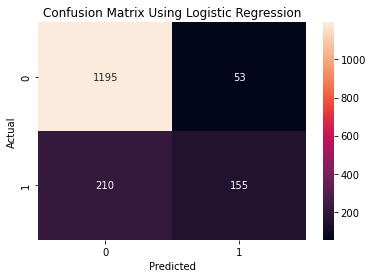

In [51]:
sns.heatmap(lr_matrix,annot=True,fmt='d')
plt.title("Confusion Matrix Using Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Note**\
TN = 21005 \
TP = 2590 \
FN = 3049 \
FP = 998

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(ytest,ypred_lr))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1248
           1       0.75      0.42      0.54       365

    accuracy                           0.84      1613
   macro avg       0.80      0.69      0.72      1613
weighted avg       0.83      0.84      0.82      1613



**INTERPRETATION**

**Accuracy**= 85%

**Precision**\
The percentage of predictions that the next day rained are correct is 72%.\
The percentage of predictions that the next day didnt rain are correct is 87%.

**Recall (Sensitivity)**\
Over the actual cases that the next day rained, the percentage of prediction that the next day rained is 46%.

**Specificity**\
Over the actual cases that the next day didnt rain, the percentage of prediction that the next day did not rain is 95%.

**F1-score**\
The percentage of positive predictions are correct is 56%.\
The percentage of negative predictions are correct is 91%.

### K-Nearest Neighbor

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)

0.909894540942928

This is the accuracy score for data training

In [56]:
ypred_knn=knn.predict(xtest)
accuracy_score(ytest,ypred_knn)

0.815251084934904

This is the accuracy score for data testing

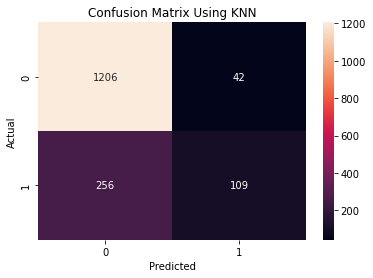

In [57]:
knn_matrix=confusion_matrix(ytest,ypred_knn)
sns.heatmap(knn_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix Using KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Note**\
TN = 21276 \
TP = 1084 \
FN = 4555 \
FP = 727

In [58]:
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1248
           1       0.72      0.30      0.42       365

    accuracy                           0.82      1613
   macro avg       0.77      0.63      0.66      1613
weighted avg       0.80      0.82      0.78      1613



**INTERPRETATION**

**Accuracy**= 81%

**Precision**\
The percentage of predictions that the next day rained are correct is 60%.\
The percentage of predictions that the next day didnt rain are correct is 82%.

**Recall (Sensitivity)**\
Over the actual cases that the next day rained, the percentage of prediction that the next day rained is 19%.

**Specificity**\
Over the actual cases that the next day didnt rain, the percentage of prediction that the next day did not rain is 97%.

**F1-score**\
The percentage of positive predictions are correct is 29%.\
The percentage of negative predictions are correct is 89%.

### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
cart=DecisionTreeClassifier()
cart.fit(xtrain,ytrain)
cart.score(xtrain,ytrain)

0.9998449131513648

This is the accuracy score for data training

In [61]:
ypred_cart=cart.predict(xtest)
accuracy_score(ytest,ypred_cart)

0.8505889646621203

This is the accuracy score for data testing

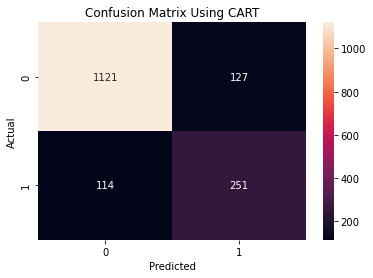

In [62]:
cart_matrix=confusion_matrix(ytest,ypred_cart)
sns.heatmap(cart_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix Using CART')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Note**\
TN = 19031 \
TP = 2849 \
FN = 2790 \
FP = 2972

In [63]:
print('Classification Report Using CART')
print(classification_report(ytest,ypred_cart))

Classification Report Using CART
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1248
           1       0.66      0.69      0.68       365

    accuracy                           0.85      1613
   macro avg       0.79      0.79      0.79      1613
weighted avg       0.85      0.85      0.85      1613



**INTERPRETATION**

**Accuracy**= 79%

**Precision**\
The percentage of predictions that the next day rained are correct is 49%.\
The percentage of predictions that the next day didnt rain are correct is 87%.

**Recall (Sensitivity)**\
Over the actual cases that the next day rained, the percentage of prediction that the next day rained is 51%.

**Specificity**\
Over the actual cases that the next day didnt rain, the percentage of prediction that the next day did not rain is 86%.

**F1-score**\
The percentage of positive predictions are correct is 50%.\
The percentage of negative predictions are correct is 87%.

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)

0.9998449131513648

This is the accuracy score for data training

In [66]:
ypred_rf=rf.predict(xtest)
accuracy_score(ytest,ypred_rf)

0.8921264724116553

This is the accuracy score for data testing

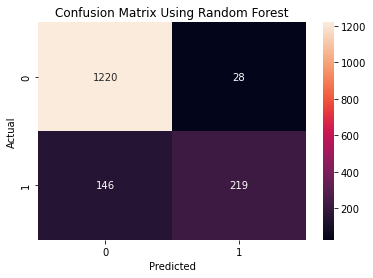

In [67]:
rf_matrix=confusion_matrix(ytest,ypred_rf)

sns.heatmap(rf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix Using Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Note**\
TN = 21171 \
TP = 2519 \
FN = 3120 \
FP = 832

In [68]:
print('Classification Report Using Random Forest')
print(classification_report(ytest,ypred_rf))

Classification Report Using Random Forest
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1248
           1       0.89      0.60      0.72       365

    accuracy                           0.89      1613
   macro avg       0.89      0.79      0.82      1613
weighted avg       0.89      0.89      0.88      1613



**INTERPRETATION**

**Accuracy**= 86%

**Precision**\
The percentage of predictions that the next day rained are correct is 75%.\
The percentage of predictions that the next day didnt rain are correct is 87%.

**Recall (Sensitivity)**\
Over the actual cases that the next day rained, the percentage of prediction that the next day rained is 45%.

**Specificity**\
Over the actual cases that the next day didnt rain, the percentage of prediction that the next day did not rain is 96%.

**F1-score**\
The percentage of positive predictions are correct is 56%.\
The percentage of negative predictions are correct is 91%.

## Conclusion

Based on the classification report of 4 methods and considering that the data is imbalanced, **the best model for this case is using Random Forest method**. It may not have the highest recall but Random Forest has the highest precision, specifity, and f1-score.

Suprisingly, the logistic regression is good enough to be compared with random forest. Thus, logistic regression could be an alternative to be used for tradinional approach.

By using Random Forest, with 27642 record for the data testing, 3952 records were misclassified.